In [ ]:
pip install --upgrade pip

In [ ]:
!pip install keras-tuner


     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=1d1341a8e22022450252351a45cb7227f5907d8962201fb39aacd4d14e5e9003
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=d3bec90b8a40fa5715ceca3f1f8c1055470b21931cda7ba0bcfc85d41c4beae6
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:

!pip install imutils


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#import cv2
from imutils import paths
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm
from PIL import Image, ImageChops, ImageEnhance
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:

tf.test.gpu_device_name()

''

In [ ]:
def ErrorLevelAnalysis(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    os.remove(resaved_filename)
    ela_im = ImageChops.difference(im, resaved_im)
     
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [ ]:
#Image.open("/kaggle/input/imgtst/imgtst/org/Im_2.jpg")

In [ ]:
#ErrorLevelAnalysis("/kaggle/input/imgtst/imgtst/org/Im_2.jpg")

In [ ]:
import io,sys


In [ ]:
 from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Image.open("drive/My Drive/collab/csa/original.jpg")

In [ ]:
path_org="drive/My Drive/collab/csa/ogr/"
path_fak="drive/My Drive/collab/csa/fke/"


In [ ]:


org = os.listdir(path_org)
fak = os.listdir(path_fak)


In [ ]:
images_names = []

for imgname in tqdm(os.listdir(path_org)):
    try:
        if imgname.endswith('png') or imgname.endswith('jpg'):
             
                imgnamefinal = path_org +'/'+ imgname  + ',0\n'
                images_names.append(imgnamefinal)
                
    except:
           print(path_org+imgname)
            
            
for imgname in tqdm(os.listdir(path_fak)):
    try:
        if imgname.endswith('png') or imgname.endswith('jpg') :
            
                    imgnamefinal = path_fak +'/'+imgname + ',1\n'
                    images_names.append(imgnamefinal)
                   
    except:
          print(path_fak+imgname)
          

100%|██████████| 921/921 [00:00<00:00, 345863.91it/s]


In [ ]:
len(images_names)


1711

In [ ]:
image_name = []
label = []
for i in tqdm(range(len(images_names))):
    image_name.append(images_names[i][0:-3])
    label.append(images_names[i][-2])
    
dataset = pd.DataFrame({'image':image_name,'output':label})
dataset['output'].value_counts()
    

100%|██████████| 1711/1711 [00:00<00:00, 513594.37it/s]


1    921
0    790
Name: output, dtype: int64

In [ ]:
dataset.to_csv('DLdataset.csv',index=False)

In [ ]:

dataset = pd.read_csv('DLdataset.csv')


In [ ]:
dataset=dataset.sample(frac=1)

In [ ]:
dataset.shape

(1711, 2)

In [ ]:
dataset.head(10)

,image,output
109,drive/My Drive/collab/csa/ogr//Au_arc_0093.jpg,0
1454,drive/My Drive/collab/csa/fke//Sp_S_NNN_R_txt0...,1
361,drive/My Drive/collab/csa/ogr//Au_cha_0078.jpg,0
680,drive/My Drive/collab/csa/ogr//Au_sec_0085.jpg,0
45,drive/My Drive/collab/csa/ogr//Au_ani_0027.jpg,0
1390,drive/My Drive/collab/csa/fke//Sp_S_NNN_C_txt0...,1
255,drive/My Drive/collab/csa/ogr//Au_art_0100.jpg,0
1147,drive/My Drive/collab/csa/fke//Sp_D_NRN_A_cha0...,1
1011,drive/My Drive/collab/csa/fke//Sp_D_NNN_A_txt0...,1
149,drive/My Drive/collab/csa/ogr//Au_ani_0044.jpg,0


In [ ]:
x=[]
y=[]

for index, data in tqdm(dataset.iterrows()):

       
    x.append(np.array(ErrorLevelAnalysis(data[0],90).resize((192, 192))).flatten() / 255.0)
    y.append(data[1])
    
    
      
    
    


1711it [15:58,  1.78it/s]


In [ ]:
X = np.array(x)
Y = np.array(y)


In [ ]:
X = X.reshape(-1, 192, 192, 3)
Y = to_categorical(Y, 2)
X.shape,Y.shape

((1711, 192, 192, 3), (1711, 2))

In [ ]:
from numpy import save
## save all the data 
save('X_.npy', X)
save('Y_.npy',Y)

In [ ]:

from numpy import load
x_ = load('X_.npy')
y_ = load('Y_.npy')
x_.shape,y_.shape

((1711, 192, 192, 3), (1711, 2))

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_, y_, test_size = 0.3,shuffle=True, random_state=3)

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((1197, 192, 192, 3), (1197, 2), (514, 192, 192, 3), (514, 2))

In [ ]:
def build_model(hp):        
    model = keras.Sequential([

    keras.layers.Conv2D(
    filters=hp.Int('conv_1_filter', min_value=32, max_value=96, step=16),
    kernel_size=hp.Choice('conv_1_kernel', values = [5,5]),
    activation='relu',
    input_shape=X_train.shape[1:]
    ),
    keras.layers.MaxPooling2D(
    pool_size=hp.Choice('2d2',values=[2,2]), strides=None,padding="valid", data_format=None
    ),
    keras.layers.Conv2D(
    filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
    kernel_size=hp.Choice('conv_2_kernel', values = [5,5]),
    activation='relu'
    ),
    keras.layers.MaxPooling2D( pool_size=hp.Choice('2d2',values=[2,2]), strides=None,padding="valid" ,data_format=None
    ),
    keras.layers.Dropout(0.5, noise_shape=None, seed=None),
    keras.layers.Flatten(),
    keras.layers.Dense(
    units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
    activation='relu'
    ),
    keras.layers.Dropout(0.5, noise_shape=None, seed=None),
    keras.layers.Dense(2, activation='softmax')
    ])
  
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-4])) , loss='binary_crossentropy',
                                                             metrics=['accuracy'])
                      
                      
                     
#   keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9, momentum=0.0,epsilon=1e-07, centered=False, name="RMSprop")
                                                             
                             
    return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="fake image")

In [ ]:

tuner_search.search(X_train,Y_train,epochs=30,validation_data = (X_test, Y_test))

Trial 5 Complete [00h 01m 24s]
val_accuracy: 0.5564202070236206

Best val_accuracy So Far: 0.8346303701400757
Total elapsed time: 00h 12m 46s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 188, 188, 96)      7296      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 94, 94, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        153664    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 45, 45, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0         
_________________________________________________________________
dense (Dense)                (None, 48)                6

In [ ]:
model.fit(X_train,Y_train, batch_size=100, epochs=30 , validation_data = (X_test, Y_test))

Epoch 1/30
12/12 [==============================] - 15s 927ms/step - loss: 0.4142 - accuracy: 0.7993 - val_loss: 0.4034 - val_accuracy: 0.8210
Epoch 2/30
12/12 [==============================] - 6s 520ms/step - loss: 0.4213 - accuracy: 0.7927 - val_loss: 0.3987 - val_accuracy: 0.8152
Epoch 3/30
12/12 [==============================] - 6s 517ms/step - loss: 0.3998 - accuracy: 0.8040 - val_loss: 0.3963 - val_accuracy: 0.8171
Epoch 4/30
12/12 [==============================] - 6s 518ms/step - loss: 0.4167 - accuracy: 0.7882 - val_loss: 0.3845 - val_accuracy: 0.8327
Epoch 5/30
12/12 [==============================] - 6s 520ms/step - loss: 0.3960 - accuracy: 0.8047 - val_loss: 0.3877 - val_accuracy: 0.8288
Epoch 6/30
12/12 [==============================] - 6s 518ms/step - loss: 0.3837 - accuracy: 0.8154 - val_loss: 0.3821 - val_accuracy: 0.8268
Epoch 7/30
12/12 [==============================] - 6s 522ms/step - loss: 0.3989 - accuracy: 0.7983 - val_loss: 0.3800 - val_accuracy: 0.8327
Epoch

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
y_pred_cnn1 = model.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn1,axis = 1)

Y_true = np.argmax(Y_test,axis = 1) 
score = accuracy_score(Y_true,  y_pred_cnn)
print("Accuracy score: {}".format(score))
score = metrics.precision_score(Y_true,y_pred_cnn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(Y_true, y_pred_cnn, average= "weighted")
print("Recall score: {}".format(score))
score_lr1 = metrics.f1_score(Y_true, y_pred_cnn, average= "weighted")
print("F1 score: {}".format(score_lr1))


Accuracy score: 0.8229571984435797
Precision score: 0.8488758729291215
Recall score: 0.8229571984435797
F1 score: 0.8157930937912765


Confusion matrix:
 [[145  83]
 [  8 278]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76       228
           1       0.77      0.97      0.86       286

    accuracy                           0.82       514
   macro avg       0.86      0.80      0.81       514
weighted avg       0.85      0.82      0.82       514

Plot of Confusion Matrix


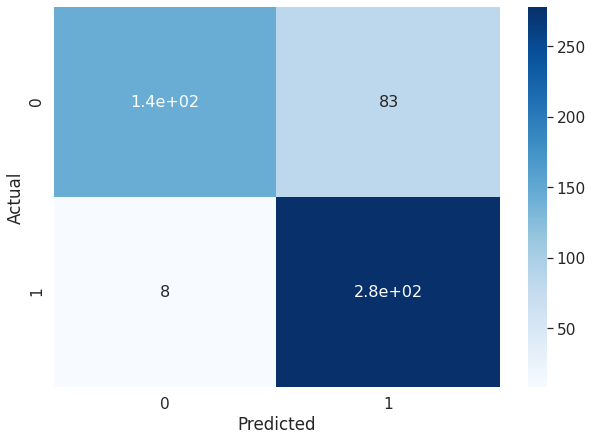

In [ ]:
import seaborn as sns
cm = confusion_matrix(Y_true, y_pred_cnn)
print('Confusion matrix:\n',cm)

print(classification_report(Y_true, y_pred_cnn))

print('Plot of Confusion Matrix')
df_cm = pd.DataFrame(cm, columns=np.unique(Y_true), index = np.unique(Y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
cnn_score = model.evaluate(X_test, Y_test, verbose=3)
print ('Test loss:', cnn_score[0])
print ('Test accuracy:', cnn_score[1])

Test loss: 0.36998090147972107
Test accuracy: 0.8229572176933289


In [ ]:
def plot_roc_curve(y_true, y_pred, y_proba):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    print('RMSE', rmse)
    from sklearn.metrics import roc_auc_score
    print('ROC_AUC score:',roc_auc_score(Y_true,y_pred_cnn))
    
    
    FPR, TPR, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(FPR, TPR)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.plot(FPR, TPR, label='' % roc_auc)
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive')
    plt.xlabel('False Positive')
    plt.show()
    
 

In [ ]:
cnn_model_y_proba=model.predict(X_test,verbose=3)
cnn_model_y_proba


array([[6.0350806e-02, 9.3964916e-01],
       [3.0467451e-01, 6.9532549e-01],
       [9.9999952e-01, 4.2751927e-07],
       ...,
       [3.2478549e-02, 9.6752143e-01],
       [2.1233760e-01, 7.8766245e-01],
       [8.0852872e-03, 9.9191475e-01]], dtype=float32)

No handles with labels found to put in legend.


RMSE 0.42076454408186564
ROC_AUC score: 0.8039964421543369


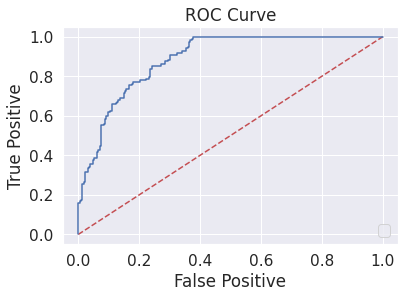

In [ ]:
plot_roc_curve(Y_true, y_pred_cnn, cnn_model_y_proba[:,1])


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save("/content/gdrive/My Drive/collab/my_model.h5")

In [ ]:
new_model=keras.models.load_model("/content/gdrive/My Drive/collab/my_model.h5")

In [ ]:
cnn_score = new_model.evaluate(X_test, Y_test, verbose=3)
print ('Test loss:', cnn_score[0])
print ('Test accuracy:', cnn_score[1])

Test loss: 0.36998090147972107
Test accuracy: 0.8229572176933289


In [ ]:
import pickle

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils


def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

# Hotfix function
def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

# Run the function
make_keras_picklable()


# Save
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# # open a file, where you stored the pickled data
# file = open('model.pkl', 'rb')

# # dump information to that file
# modell = pickle.load(file)

In [ ]:
# y_pred_cnn1 = modell.predict(X_test)
# y_pred_cnn = np.argmax(y_pred_cnn1,axis = 1)

# Y_true = np.argmax(Y_test,axis = 1) 
# score = accuracy_score(Y_true,  y_pred_cnn)
# print("Accuracy score: {}".format(score))

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': '1dfeVOBXHsgegh5zn0R7JlrQAyjwTefUO'}]})
file.SetContentFile('model.pkl')
file.Upload() 

import pickle

class MyClass:
    def __init__(self, name):
        self.name = name

if __name__ == '__main__':
    o = MyClass('test')
    with open('model.pkl', 'wb') as f:
        pickle.dump(o, f)

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=6djItPfLYYfq7GXsPmqhxD9LwErChs&prompt=consent&access_type=offline&code_challenge=UXYUASLwo667mk1E_hH41GXY5FHTIgowSWscZ_cbZ3k&code_challenge_method=S256

Enter verification code: 4/1AY0e-g7qLfiagouPU7FYEnk8umJua5CXYBLob9tZrsysz6NnIvzCDy-nD44


In [ ]:
DATA_PATH = 
infile = open(DATA_PATH+'/model.pkl','rb')
best_model2 = pickle.load(infile)

SyntaxError: ignored

In [ ]:
from google.colab import files
mode=files.download('model.pkl')


In [ ]:
y_pred_cnn1 = best_model2.predict(X_test)
y_pred_cnn = np.argmax(y_pred_cnn1,axis = 1)

Y_true = np.argmax(Y_test,axis = 1) 
score = accuracy_score(Y_true,  y_pred_cnn)
print("Accuracy score: {}".format(score))